# 1. Customer Segmentation Using K-mean clustering

In [3]:
# Importing necesssary Labraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") 

# 2. Load Data Exploration and  Data Preprocessing

In [4]:
df = pd.read_csv("C:/Users/sarth/Downloads/Mall_Customers.csv")

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Droping unnecessary columns
df = df.drop('CustomerID', axis=1)

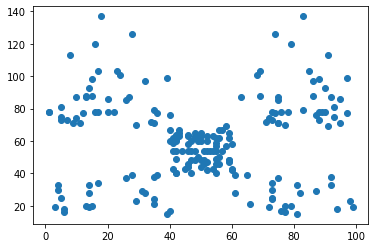

In [24]:
# visualize the relationship between the spending score and the annual income of the customers
plt.scatter(df["Spending Score (1-100)"] , df["Annual Income (k$)"])
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Feature normalization
# scales data between a minimum and maximum value.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Choosing the Optimum Number of Clusters (Elbow Method)
#  The WCSS is a measure of the variance within each cluster, and it decreases as the number of clusters increases.
#  It is used to determine the optimal number of clusters (i.e., the number of segments) in the dataset by using the elbow method.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[23.040720326039906, 13.993505283127979, 9.058985215159455, 6.110312266413655, 3.583117905952559, 3.0983851418825834, 2.624103948396722, 2.218057312083073, 1.8734346678670708, 1.6557947221391272]


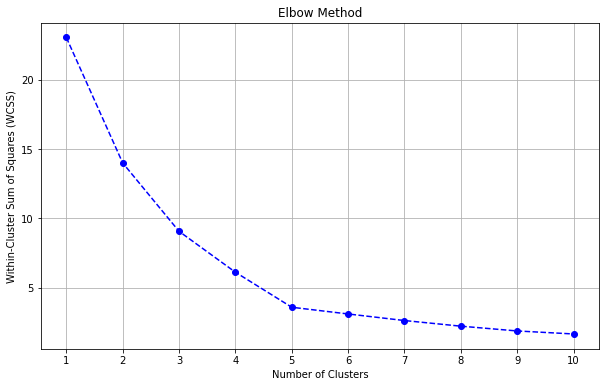

In [27]:
# Plotting the Elbow Method graph with styling
plt.figure(figsize=(10, 6)) 
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))  
plt.grid(True) 
plt.show()

# 3. Apply k-Mean clustering

In [31]:
# Training the K-Means Clustering Model
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

# 4.Analyze Segments

In [32]:
y_predicted  = model.fit_predict(df[["Spending Score (1-100)" , "Annual Income (k$)"]])
y_predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [33]:
df["Group"] = y_predicted

In [34]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,1
197,Male,32,126,74,4
198,Male,32,137,18,1


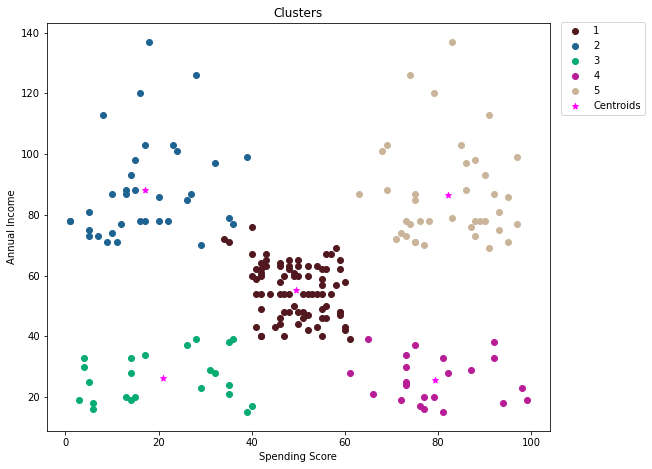

In [36]:
# applies k-means clustering to the data, analyzes the segments, and visualizes the clusters using a scatter plot. 
# The code also displays the centroids of the clusters and labels them as "Centroids".
#  it performs feature normalization using MinMaxScaler, and uses the elbow method to choose the optimum number of clusters.
df1=  df[df.Group == 0]
df2=  df[df.Group == 1]
df3=  df[df.Group == 2]
df4=  df[df.Group == 3]
df5=  df[df.Group == 4]
plt.figure(figsize = (9,7.5))
plt.scatter(df1["Spending Score (1-100)"] , df1["Annual Income (k$)"]  , color = "#521820" , label = "1")
plt.scatter(df2["Spending Score (1-100)"] , df2["Annual Income (k$)"]  , color = "#1f6393" , label = "2")
plt.scatter(df3["Spending Score (1-100)"] , df3["Annual Income (k$)"] , color = "#06ac72" , label = "3")
plt.scatter(df4["Spending Score (1-100)"] , df4["Annual Income (k$)"], color = "#b91c97" , label = "4")
plt.scatter(df5["Spending Score (1-100)"] , df5["Annual Income (k$)"] , color = "#cab59a" , label = "5")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()